In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Online_Sales_Data.csv")

In [7]:
print("\nInformation about DataFrame:\n",df.info())
print("\nDescription about DataFrame:\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB

Information about DataFrame:
 None

Description about DataFrame:
        Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
m

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

Only Date has the wrong Data type so had to up date it

In [ ]:
print("\nUpdated DataFrame:\n",df.info())

In [ ]:
print("\nChecking for null values:\n",df.isnull().sum())
print("\nChecking for duplicates values:\n",df.duplicated())

No null values or duplicate values were found

Interpretation up until now is that Date has wrong data types so had to change that also there were no duplicate or null values were found

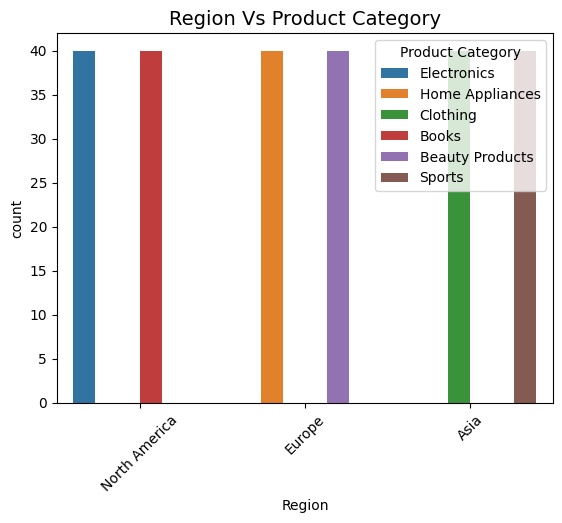

In [26]:
sns.countplot(data=df,x="Region",hue="Product Category")
plt.title("Region Vs Product Category",fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.show()

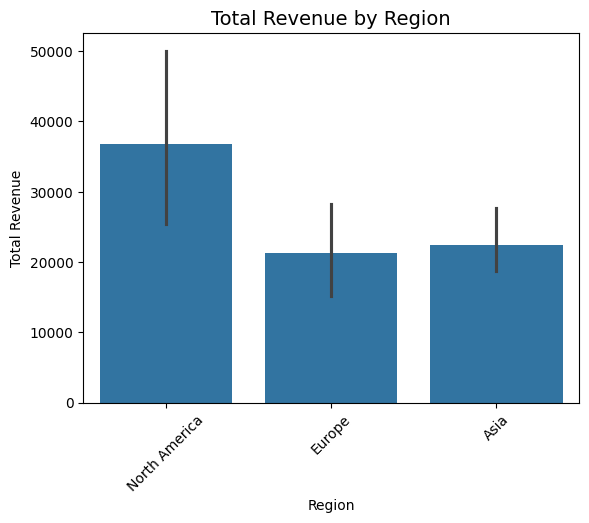

In [25]:
sns.barplot(data=df, x="Region", y="Total Revenue", estimator=sum)
plt.title("Total Revenue by Region", fontsize=14)
plt.xticks(rotation=45)
plt.show()

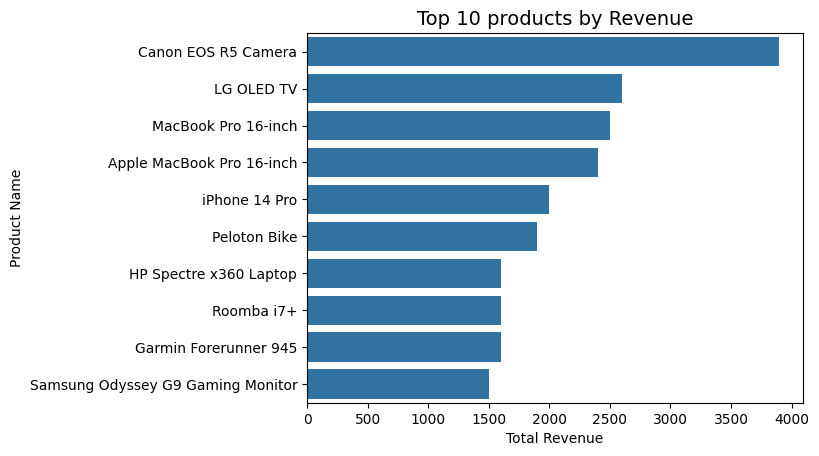

In [24]:
top_products = df.groupby("Product Name")["Total Revenue"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values,y=top_products.index)
plt.title("Top 10 products by Revenue",fontsize=14)
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.show()

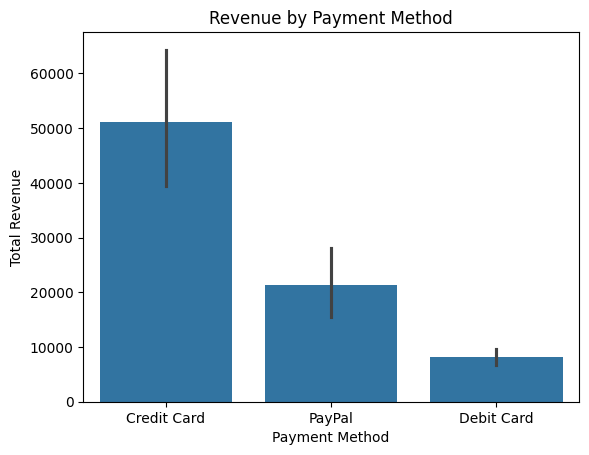

In [27]:
sns.barplot(data=df,x="Payment Method",y="Total Revenue",estimator=sum)
plt.title("Revenue by Payment Method")
plt.show()

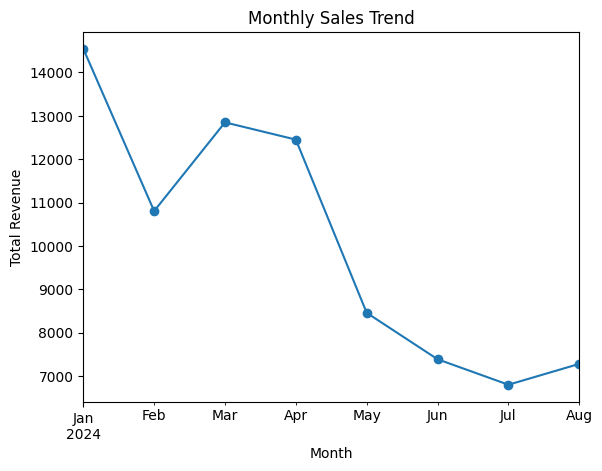

In [28]:
df["Date"] = pd.to_datetime(df["Date"])
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Total Revenue"].sum()
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


From the Graph's we did conclusion can be made:-
1) Credit card is the most common method of payment
2) A very big noticable sales drop was seen between April and July
3) The highest revenue is made from Canon EOS R5 Camera 